In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
train_dataset = train.flow_from_directory("C:/Users/Dell/Downloads/skin_type/train/",
                                         target_size=(200, 200),
                                         batch_size=3,
                                         class_mode='categorical')

validation_dataset = train.flow_from_directory("C:/Users/Dell/Downloads/skin_type/validation/",
                                         target_size=(200, 200),
                                         batch_size=3,
                                         class_mode='categorical')


Found 31 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [6]:
train_dataset.class_indices

{'dry': 0, 'normal': 1, 'oily': 2}

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(3,activation='softmax')
                                    
                                    
    
])

In [8]:
model.compile(loss= 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
             )

In [9]:
try:
    model_fit = model.fit(
        train_dataset,
        steps_per_epoch=len(train_dataset),
        epochs=15,
        validation_data=validation_dataset
    )
except Exception as e:
    print("Error during training:", e)


Epoch 1/15


11/11 [==============================] - 3s 211ms/step - loss: 9.7825 - accuracy: 0.2903
Epoch 2/15
11/11 [==============================] - 2s 185ms/step - loss: 1.4083 - accuracy: 0.5484
Epoch 3/15
11/11 [==============================] - 2s 173ms/step - loss: 1.5225 - accuracy: 0.3226
Epoch 4/15
11/11 [==============================] - 2s 171ms/step - loss: 1.2290 - accuracy: 0.7097
Epoch 5/15
11/11 [==============================] - 2s 174ms/step - loss: 0.8911 - accuracy: 0.5484
Epoch 6/15
11/11 [==============================] - 2s 185ms/step - loss: 1.0584 - accuracy: 0.6774
Epoch 7/15
11/11 [==============================] - 2s 167ms/step - loss: 0.4371 - accuracy: 0.9032
Epoch 8/15
11/11 [==============================] - 2s 196ms/step - loss: 0.4301 - accuracy: 0.8710
Epoch 9/15
11/11 [==============================] - 2s 168ms/step - loss: 0.2096 - accuracy: 0.9677
Epoch 10/15
11/11 [==============================] - 2s 168ms/step - loss: 0.0285 - accuracy: 1.00

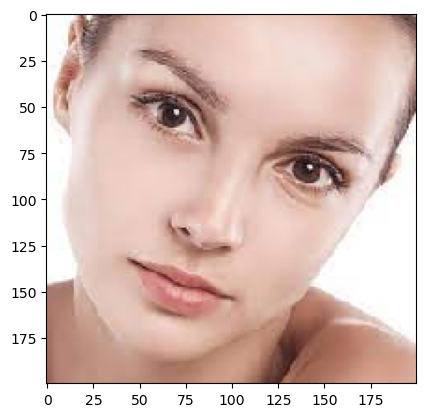

1/1 [==============================] - 0s 292ms/step
Skin Type: Normal


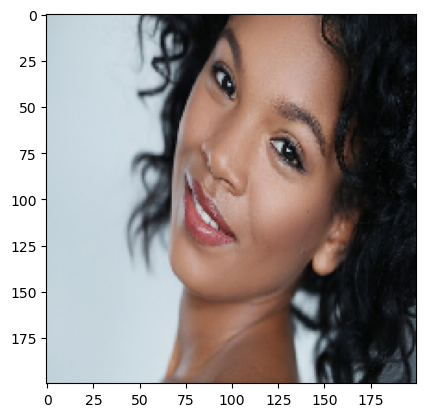

1/1 [==============================] - 0s 24ms/step
Skin Type: Oily


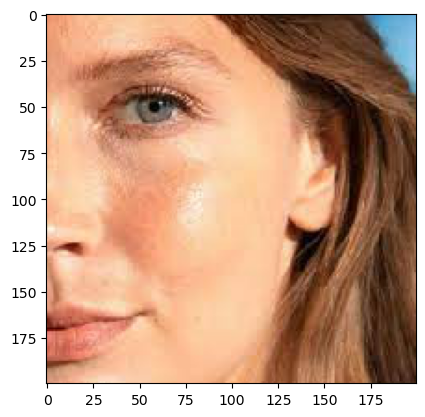

1/1 [==============================] - 0s 28ms/step
Skin Type: Oily


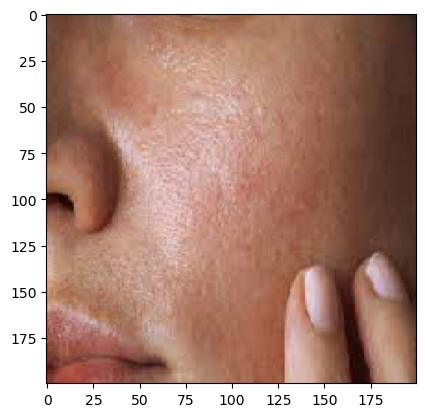

1/1 [==============================] - 0s 26ms/step
Skin Type: Dry


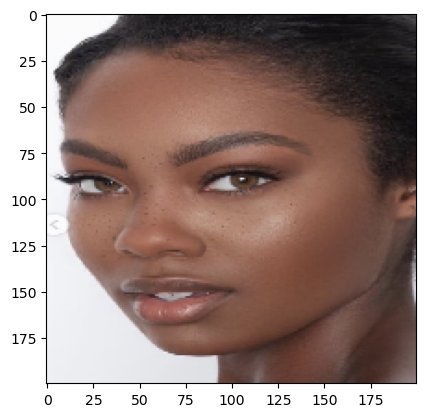

1/1 [==============================] - 0s 23ms/step
Skin Type: Normal


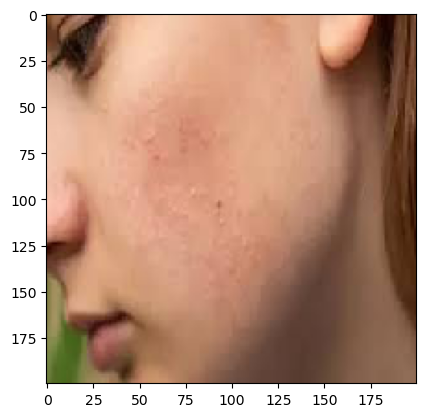

1/1 [==============================] - 0s 24ms/step
Skin Type: Dry


In [10]:
dir_path = 'C:/Users/Dell/Downloads/skin_type/test'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    predicted_class = np.argmax(val)  # Get the index of the highest probability class

    if predicted_class == 0:
        print('Skin Type: Dry')
    elif predicted_class == 1:
        print('Skin Type: Normal')
    else:
        print('Skin Type: Oily')
